In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read the csv file

data=pd.read_csv(r'/Users/jenniferchen/Desktop/652Dataset2.csv')
data
print(data.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367    

# Exploratory Data Analysis 

total number of NAs: 5279
Total Number of Duplicated Records: 0
Column Names: Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


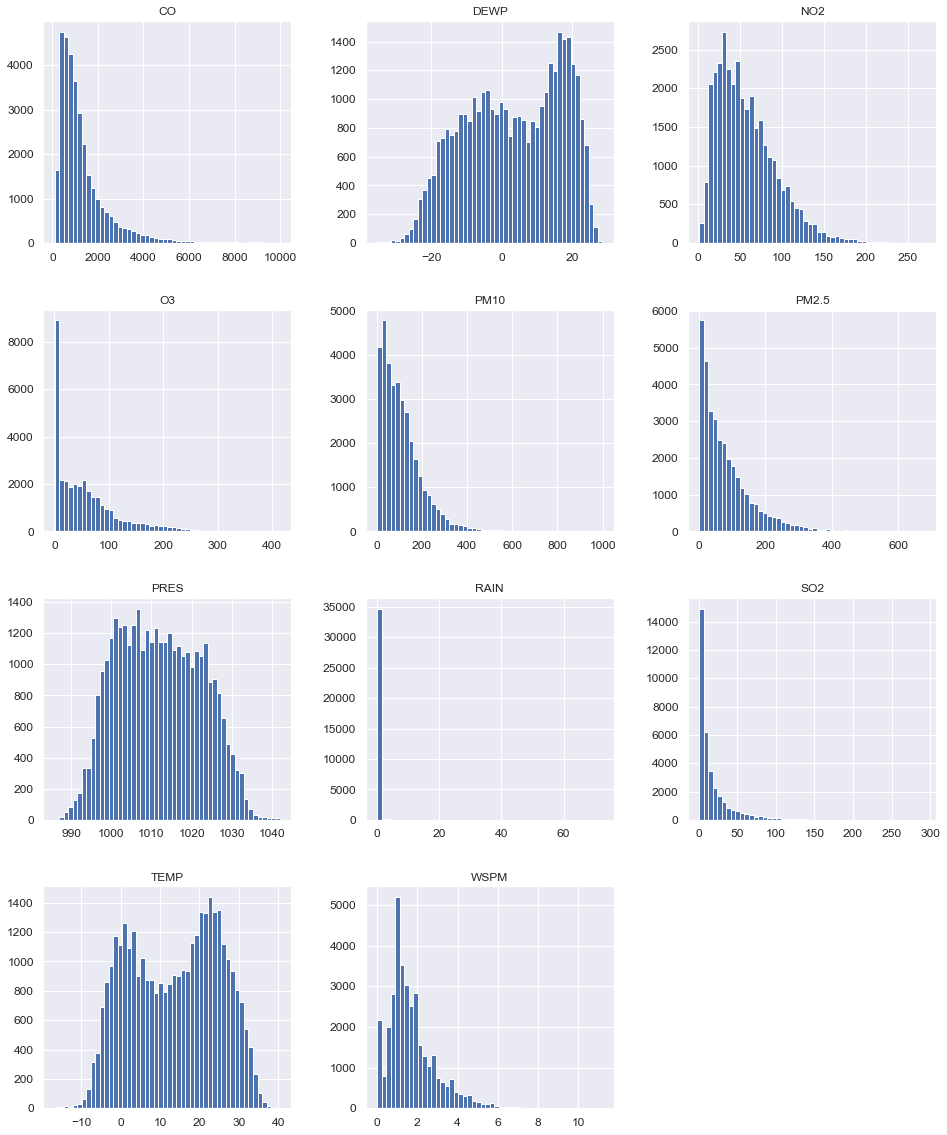

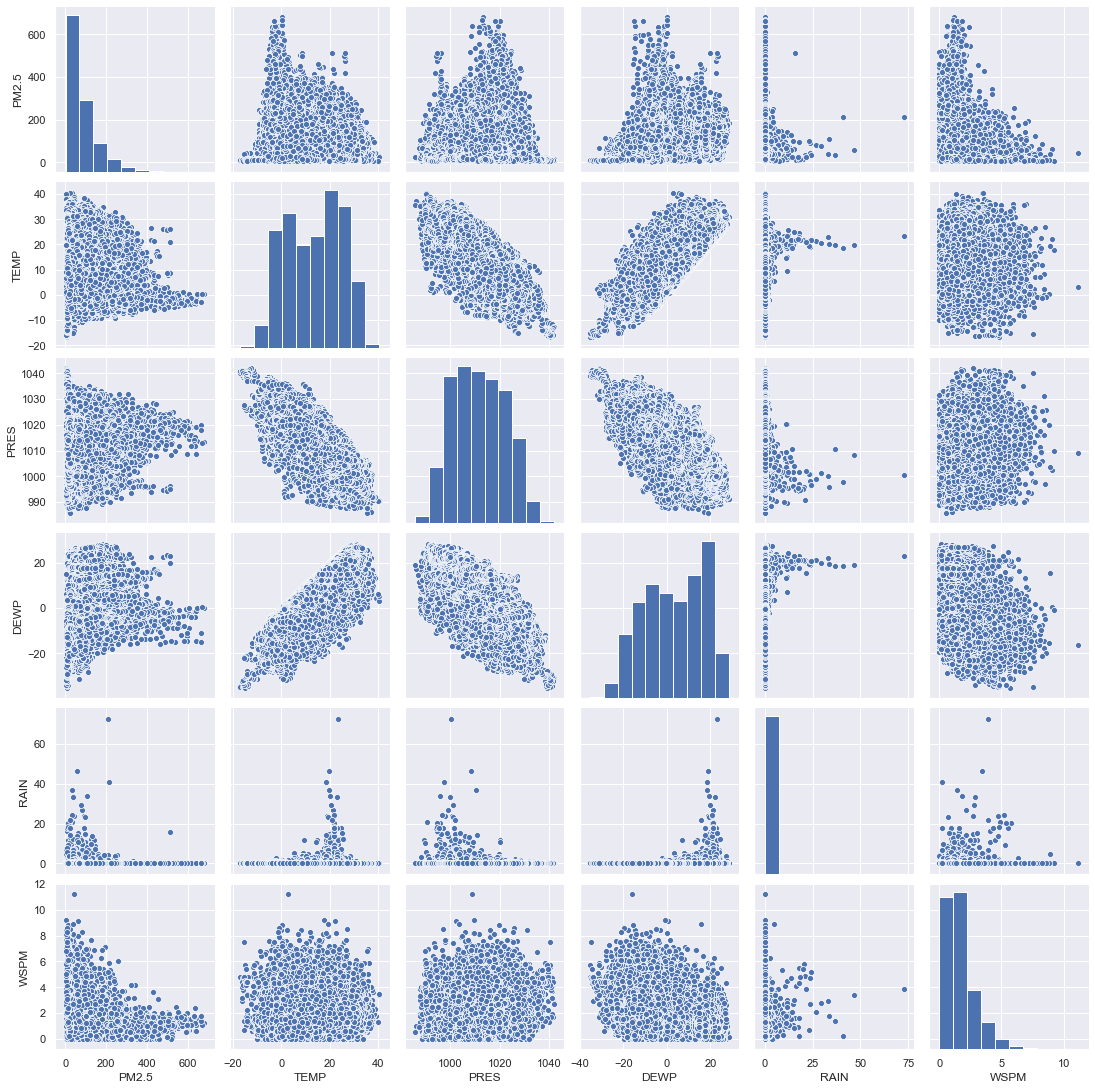

In [156]:
# Find all NAs
from numpy import nan as NA
totalNA=data.isnull().values.sum()
print("total number of NAs:",totalNA)

# Find all duplicated records
dups=df.duplicated().values.sum()
print("Total Number of Duplicated Records:",dups)

##### Pair Plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

print("Column Names:",data.columns)
df_num=data.select_dtypes(include=['float64'])
df_num.hist(figsize=(16,20),bins=50,xlabelsize=12,ylabelsize=12)    
#plt.savefig('Histogram for all numeric attributes.png')


cols=['PM2.5','TEMP', 'PRES', 'DEWP', 'RAIN','WSPM']
sns.pairplot(data[cols],height=2.5)
plt.show()

# Visualization

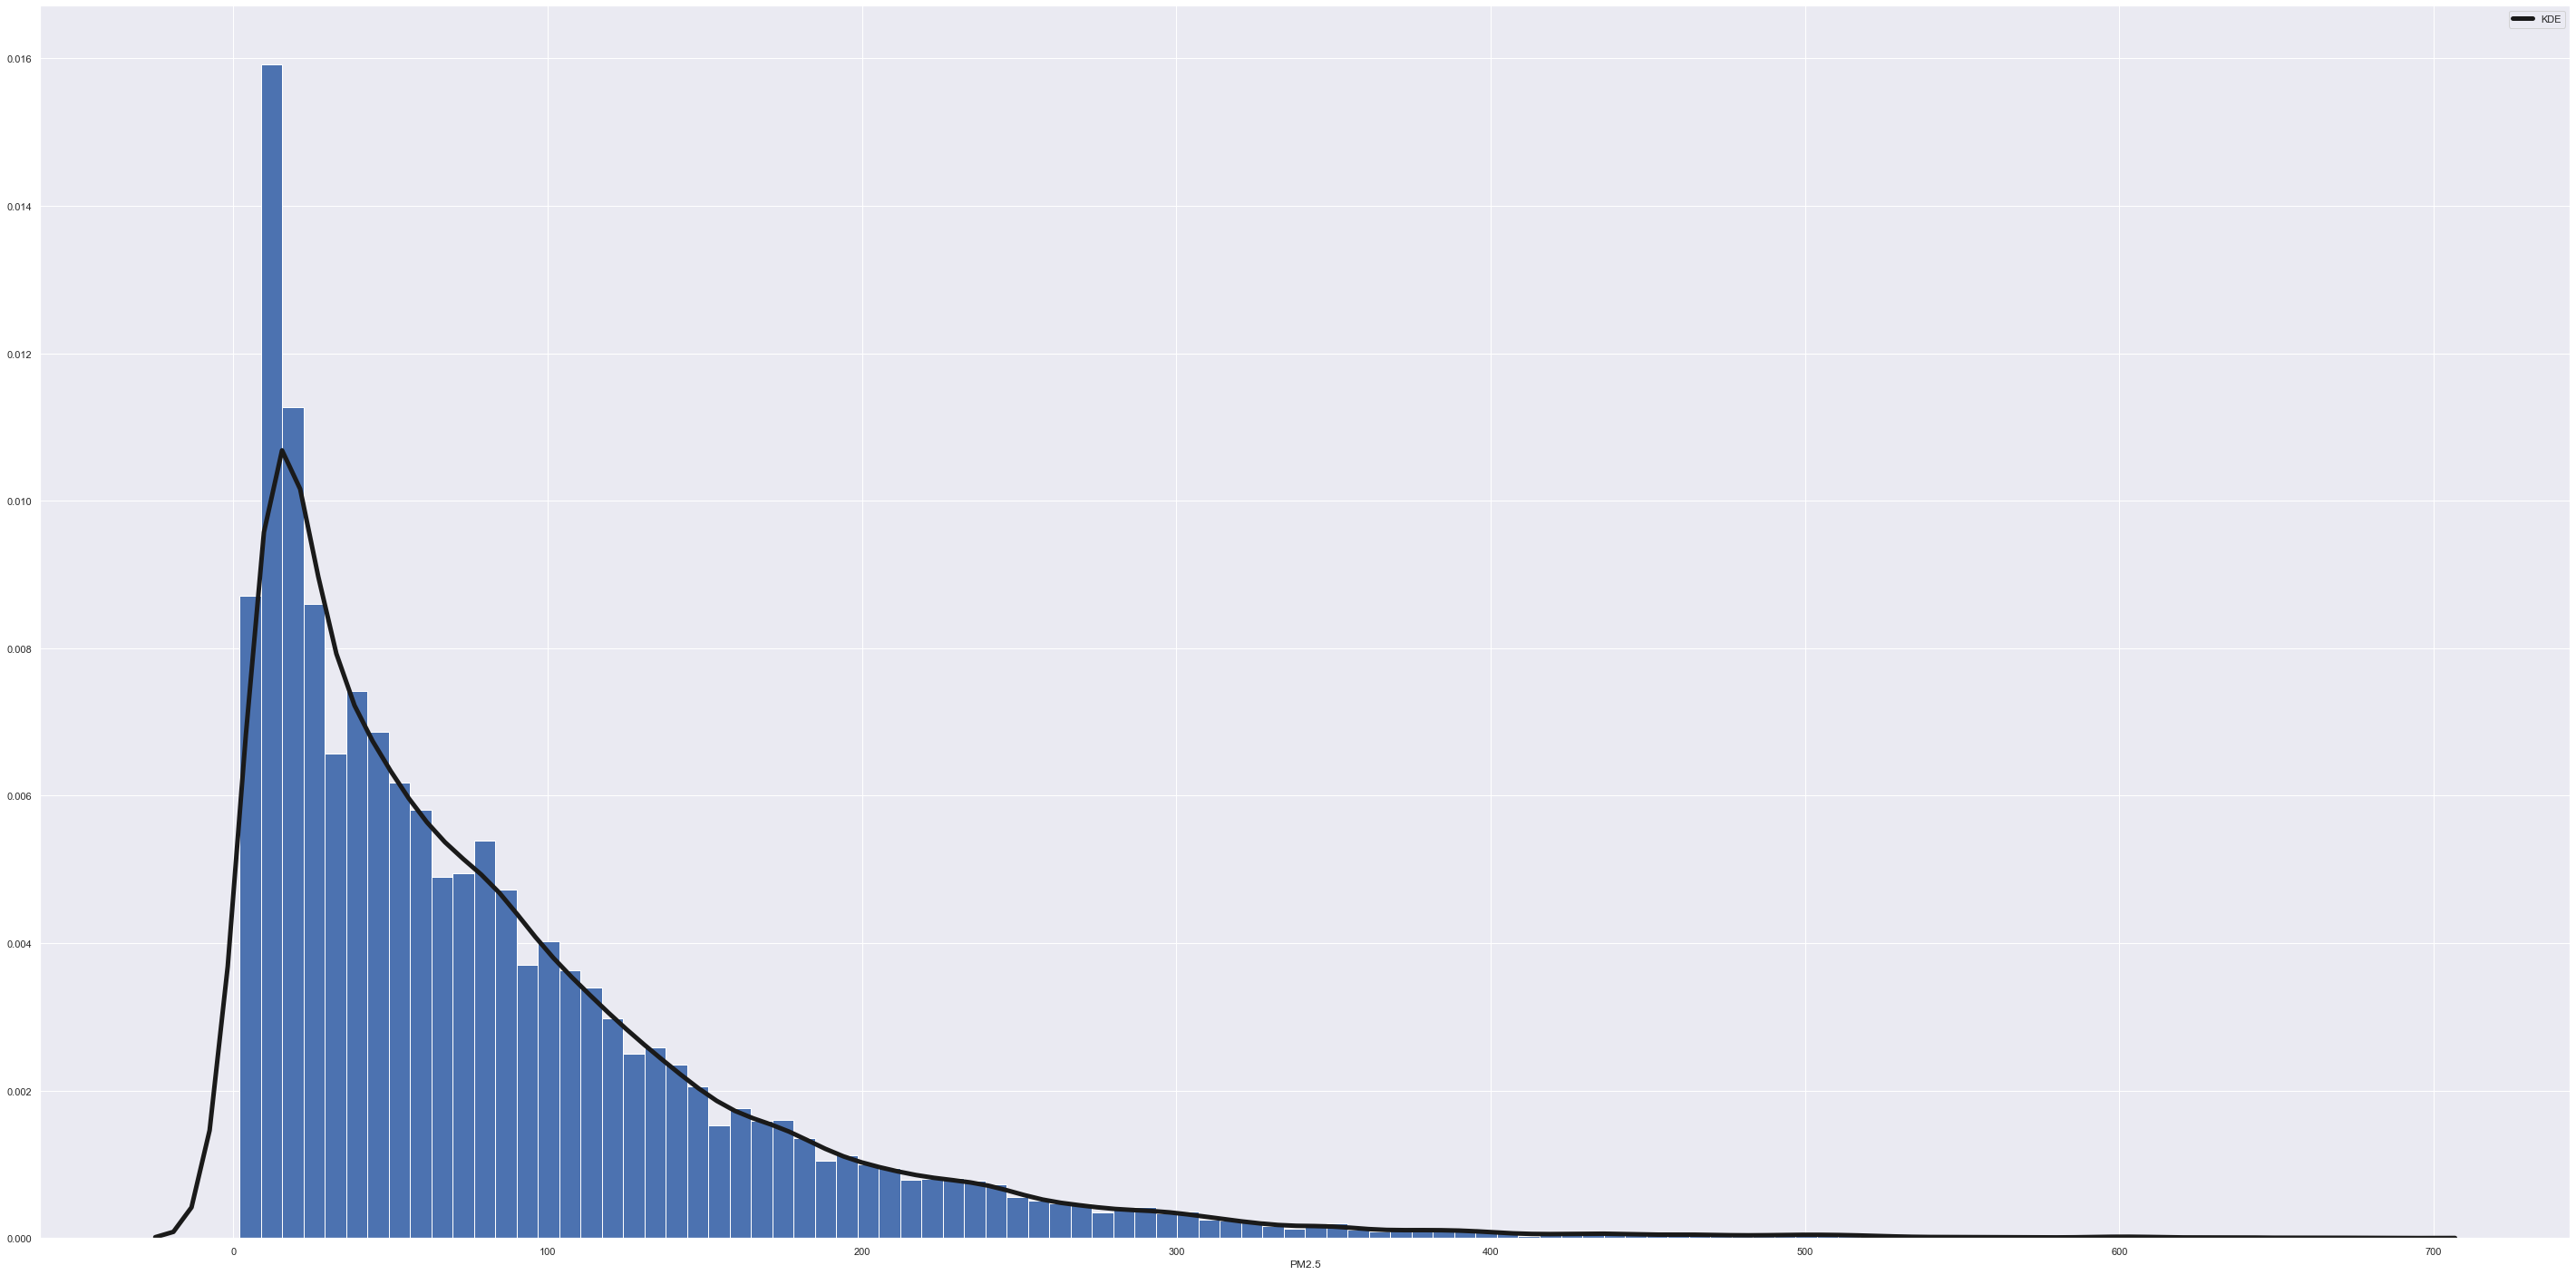

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid',context='notebook')
plt.figure(figsize=(50,25))
sns.distplot(data['PM2.5'],bins=100,hist_kws={'alpha':1},kde_kws={"color": "k", "lw": 5, "label": "KDE"})

#plt.savefig('PM2.5 Distribution.png')




# Data Preprossing & Preparation

In [188]:
#since the last column only contain one unique value, which is GuanYuan, thus I will drop the last column "station"
print(data)
data2=data.drop(columns=['station'])


# Find all NAs
from numpy import nan as NA
totalNA=data.isnull().values.sum()
print("total number of NAs:",totalNA) 

narows=data.isnull().any(axis=1).sum()
print("number of rows that has NAs =",narows)
#Find out which columns has NAs and manipulate the NAs based on the type of column#
columnwithNA=data.columns[data.isna().any()].tolist()
print("Columns with NAs:",columnwithNA)


### Replace the cateogrical missing data with mode and drop all missing numerical data
data2['wd']=data['wd'].fillna(data['wd'].mode())
df=data2.dropna()
totalNA=df.isnull().values.sum()
print("total number of NAs:",totalNA)

# Find all duplicated records 
dups=df.duplicated().values.sum()
print("Total Number of Duplicated Records:",dups)

# Identify Outliers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_label=df.apply(le.fit_transform)
mean_val = df_label.mean()
std_limit = 3* df_label.std()
abs_val=df_label.abs()
cond=df_label[abs_val-mean_val>std_limit]
outilers=cond.count()
outilers=outilers[outilers>0]

print("Columns that potentially contains outliers")
print(outilers)


print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0   
1          2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0   
2          3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0   
3          4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0   
4          5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   13.0  37.0   3.0  36.0  400.0  60.0   
35060  35061  2017      2   28    20   20.0  43.0   4.0  48.0  500.0  43.0   
35061  35062  2017      2   28    21   16.0  33.0   5.0  39.0  500.0  50.0   
35062  35063  2017      2   28    22   11.0  24.0   5.0  47.0  500.0  41.0   
35063  35064  2017      2   28    23   15.0  27.0   5.0  53.0  600.0  33.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0      -

# Supervised Model: Linear Regression

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf



X=df[['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
Y=df['PM2.5']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

linearReg=LinearRegression().fit(X,Y)

Y_pred=linearReg.predict(X_test)

model=sm.OLS(Y,X).fit()

predictions=model.predict(X_test)
print_model=model.summary()
print(print_model,'\n')
print("predications",predictions,'\n')

#######  Linear Regression and Lasso Regression Model Estimation Comparison #######

lr=LinearRegression()
lr.fit(X_train,y_train)
pred_train_lr=lr.predict(X_train)

print("Linear Regression MSE on Train Data:",mean_squared_error(y_train,pred_train_lr))
print("R-sqaured Value on train data:",r2_score(y_train,pred_train_lr),'\n')

pred_test_lr=lr.predict(X_test)
print("Linear Regression MSE on Test Data:",mean_squared_error(y_test,pred_test_lr))
print("R-sqaured Value on test data:",r2_score(y_test,pred_test_lr),'\n')


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

model_lasso=Lasso(alpha=0.01)
model_lasso.fit(X_train,y_train)
pred_train_lasso=model_lasso.predict(X_train)
print("Lasso Regression MSE on Train Data:",mean_squared_error(y_train,pred_train_lasso))
print("Lasso Rsquare on Train:",r2_score(y_train, pred_train_lasso),'\n')
pred_test_lasso= model_lasso.predict(X_test)
print("Lasso Regression MSE on Test Data:",mean_squared_error(y_test,pred_test_lasso))
print("Lasso Rsquare on Test:",r2_score(y_test, pred_test_lasso),'\n')



                                 OLS Regression Results                                
Dep. Variable:                  PM2.5   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                          2.274e+04
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                        0.00
Time:                        21:07:03   Log-Likelihood:                     -1.6708e+05
No. Observations:               32263   AIC:                                  3.342e+05
Df Residuals:                   32254   BIC:                                  3.342e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

 # Supervised Model: Bayes & Decision Tree Regression

In [178]:
######## Bayes Model by categoring into "low" and "high" #########
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB, BernoulliNB
y2 = pd.qcut(Y, 2, labels = ['low', 'high'])
', '.join(dir(y2))
print(np.vstack([Y, y2]).T,'\n')

gnbc = GaussianNB()
print("Gaussian naive bayes accuracy: ", round(cross_validate(gnbc, X, y2, cv=5)['test_score'].mean(), 3),'\n')

################ Decision Tree Regression #################
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_reg_pred = dt.predict(X_test)

print("Decision Tree Regression Predict")
comparisondf=pd.DataFrame({'Actual':y_test,'Predicted':dt_reg_pred})
print(comparisondf)

print('Decision tree regression R2: ', round(r2_score(y_test, dt_reg_pred), 2))
print("Decision tree regression MSE is ", mean_squared_error(y_test, dt_reg_pred))



[[4.0 'low']
 [4.0 'low']
 [3.0 'low']
 ...
 [16.0 'low']
 [11.0 'low']
 [15.0 'low']] 

Gaussian naive bayes accuracy:  0.79 

Decision Tree Regression Predict
       Actual  Predicted
14952    31.0       30.0
526      54.0       48.0
14042    98.0       60.0
7992     13.0       10.0
8984     56.0       80.0
...       ...        ...
34563    99.0       98.0
23359    14.0       13.0
12790    34.0       44.0
17414   135.0       78.0
17278   182.0      100.0

[6453 rows x 2 columns]
Decision tree regression R2:  0.74
Decision tree regression MSE is  1645.92929800093
